Установка и импорт библиотеки Open CV

In [ ]:
!pip install opencv-python #Установка Open CV, если нехватает то и отальные библиотеки аналогично

In [1]:
import cv2
print(cv2.__version__)

4.10.0


In [2]:
import numpy as np    #Для работы с матрицами и тп
import requests       #Для скачивания по ссылке

In [3]:
#Функция для вывода изображения в ноуттбук
from PIL import Image
def show_image(image):
    pil_img = Image.fromarray(image)
    return pil_img

**Метод Виолы-Джонса**

Является одним из самых популярных алгоритмов обнаружения объектов в реальном времени, особенно для распознавания лиц. Он был предложен Полом Виолой и Майклом Джонсом в 2001 году и стал основой для многих современных систем компьютерного зрения.

Основные этапы метода включают:

1. **Интегральное представление изображения**: Это позволяет быстро вычислять суммы пикселей в различных областях изображения, что ускоряет обработку данных.
   
2. **Классификация Хаара** (Haar-like features): Используются простые прямоугольные признаки, которые позволяют эффективно выделять характерные черты лица, такие как глаза, нос и рот.

3. **Бустинг AdaBoost**: Алгоритм обучения с учителем, который комбинирует слабые классификаторы для получения сильного классификатора. В данном случае он используется для выбора наиболее значимых признаков Хаара.

4. **Каскадная классификация**: Позволяет быстро отбрасывать области изображения, которые не содержат интересующий объект (например, лицо), тем самым ускоряя процесс обработки.

Метод Виолы-Джонса широко применяется благодаря своей высокой скорости и точности при обнаружении объектов в видеопотоке. Он легок в реализации и может работать даже на устройствах с ограниченными вычислительными ресурсами.

Перейдя на страницу репозитория: https://github.com/opencv/opencv/tree/master/data/haarcascades

Здесь хранятся самые актуальные версии каскадов, поддерживаемые разработчиками OpenCV.

**Загрузка каскада**

In [ ]:
# URL для скачивания файла
url = 'https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml'

# Отправляем GET-запрос
response = requests.get(url)

# Сохраняем файл haarcascade_profileface.xml сохранен в текущей директории
with open('haarcascade_frontalface_default.xml', 'wb') as file:
    file.write(response.content)

cascade=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [10]:
#Или загрузка по путии к файлу
cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml') #Загрузка каскада для обнаружения Лиц методом Виола-Джонса  haarcascade_frontalface_default.xml

**Загрузка изображения**

In [13]:
#Скачать изображение по ссылке
#url = 'https://avatars.mds.yandex.net/i?id=40b9bb0db357bbbeb6ed43e3d5790690_l-12935950-images-thumbs&n=13'
url = 'https://cdn.vox-cdn.com/thumbor/-oI_3OP7Ubt_GOqm-1ftx1PemTY=/0x14:1000x681/1200x800/filters:focal(0x14:1000x681)/cdn.vox-cdn.com/photo_images/2580036/GYI0064489455.jpg'

resp = requests.get(url, stream=True).raw
img = np.asarray(bytearray(resp.read()), dtype="uint8")
img = cv2.imdecode(img, cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #Перевод в RGB 

#show_image(img)

In [ ]:
#Загрузка из файла
img = cv2.imread('real2010.jpg')  # Мтожем просто загрузить изображение с компьтера, указав путь к изображению
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #Перевод в RGB 

#show_image(img)

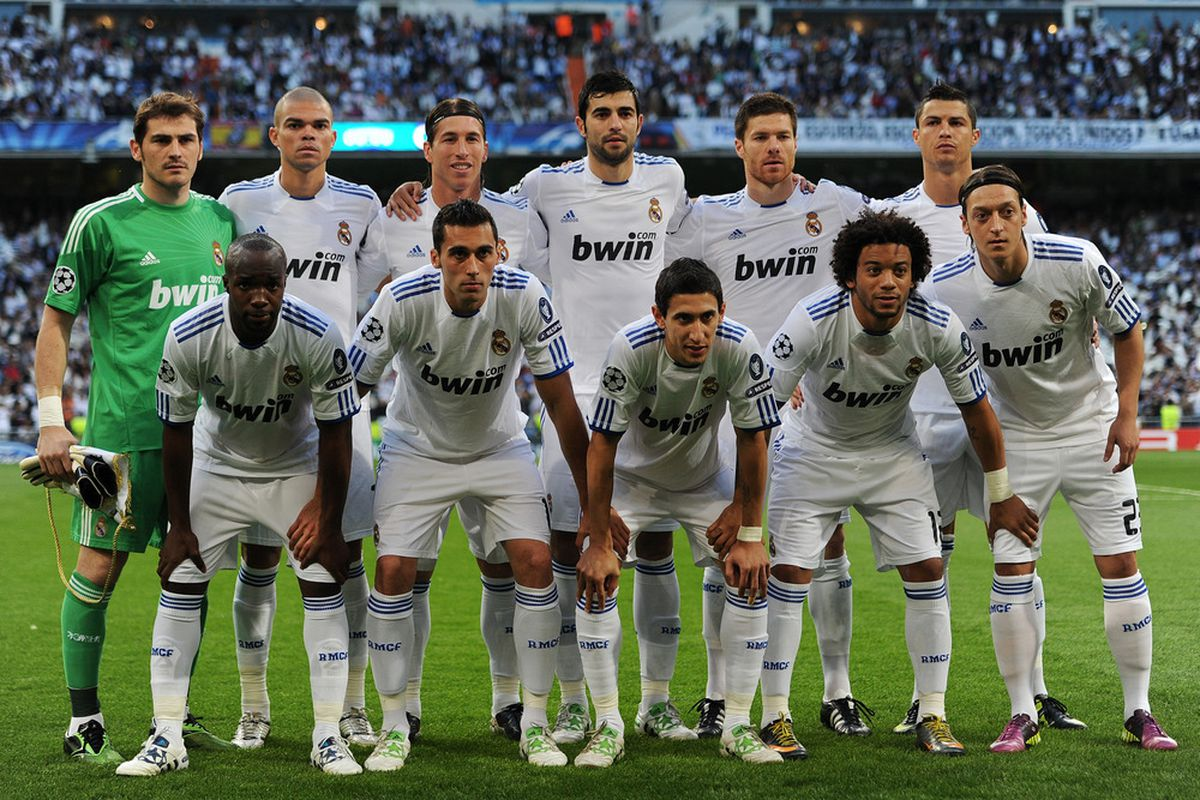

In [16]:
#Вывод изображения
show_image(img)

**Преобразование в Чернобелый формат**

In [21]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) #Перевод изображения в чернобелый формат
#show_image(gray)

**Прменяем Метод каскадов для поиска обьектов на изображении**

In [23]:
object = cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=4) #Определение обьектов, описание параметров представленно ниже

In [25]:
print(object) # формат вывода результата x, y, w, h

[[435 225  74  74]
 [957 184  77  77]
 [915  99  61  61]
 [846 239  80  80]
 [275  98  67  67]
 [577  85  74  74]
 [653 288  78  78]
 [428 113  66  66]
 [142 115  67  67]
 [742 113  61  61]]


In [27]:
#Рисуем прямоугольники для каждого найденного обьекта
img_result=img
for (x, y, w, h) in object:
    img_result=cv2.rectangle(img_result, (x, y), (x+w, y+h), (0, 255,0), 3) 

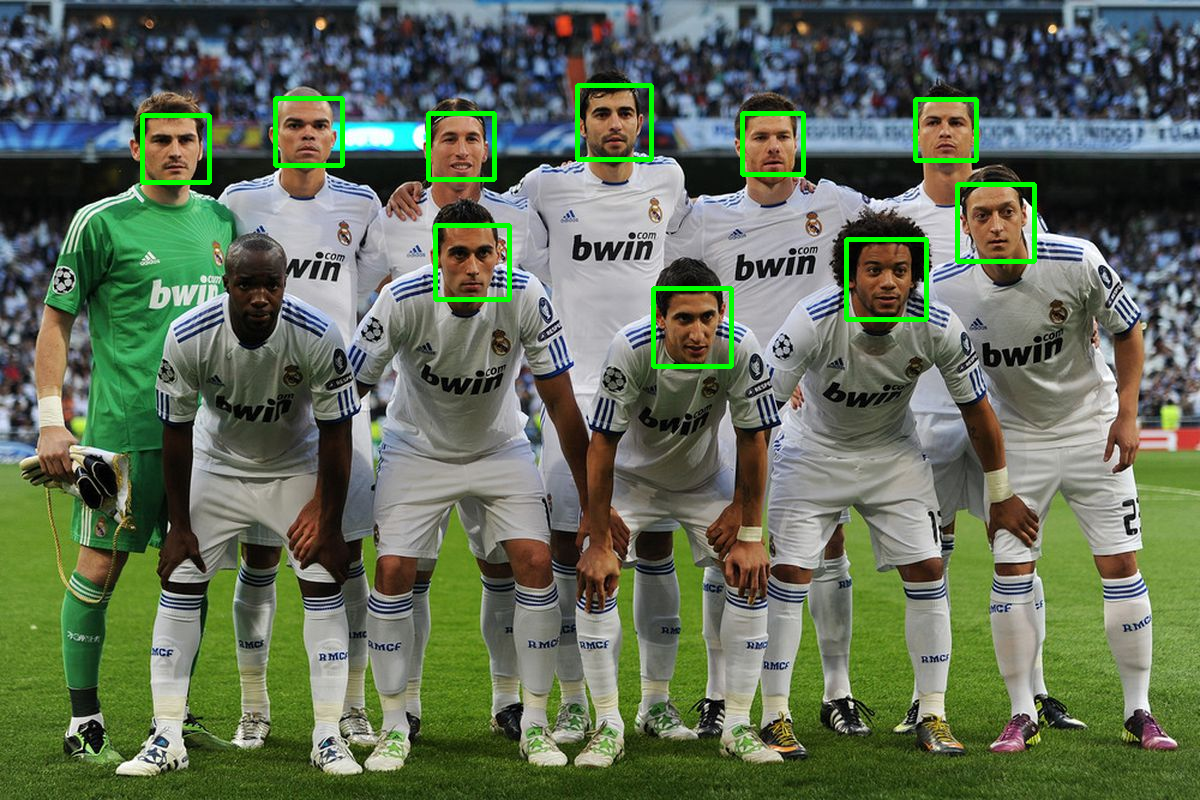

In [29]:
show_image(img_result) #вывод полученного результата #Всего два так как распознаются только фронтальные лица

In [ ]:
#вывод полученного результата в окне
img_bgr = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) #Перевод
cv2.namedWindow("image_logo", cv2.WINDOW_NORMAL)
cv2.imshow("image_logo", img_bgr)
cv2.waitKey(0)
cv2.destroyAllWindows()

**Поробуем запустить алгоритм с большим поличпеством классов в режиме реального времени**

In [35]:
import time
import cv2

In [37]:
# Путь к файлам каскадов встроенный в OpenCV
cascade_path = cv2.data.haarcascades
# Загрузка каскада для обнаружения лиц
face_cascade = cv2.CascadeClassifier(cascade_path + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cascade_path + 'haarcascade_eye.xml')
smile_cascade = cv2.CascadeClassifier(cascade_path + 'haarcascade_smile.xml')
fullbody_cascade = cv2.CascadeClassifier(cascade_path + 'haarcascade_fullbody.xml')

In [43]:
# Захват видео с камеры
capture_io = cv2.VideoCapture(0)

if not capture_io.isOpened():
    print("Не удалось открыть камеру")
else:
    start_time = time.time()
    fps_counter = 0
    font = cv2.FONT_HERSHEY_SIMPLEX
    text_color = (255, 255, 255)  # Белый цвет текста

    while True:
        ret, frame = capture_io.read()

        if not ret:
            print("Не удалось получить кадр")
            break
            
        #Подсчет fps
        fps_counter += 1
        current_time = time.time()
        elapsed_time = current_time - start_time
        if elapsed_time >= 1:
            fps = int(fps_counter / elapsed_time)
            fps_counter = 0
            start_time = current_time

        # Преобразование кадра в оттенки серого
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Обнаружение лиц, глаз и полного тела
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

        # Рисование прямоугольников вокруг обнаруженных объектов
        for (x, y, w, h) in faces:
            cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
            
        #Дополнительные классы, их дорбавление сильно влияет на количество твычислений и следовательно FPS
        '''eyes = eye_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)
        fullbody = fullbody_cascade.detectMultiScale(gray, scaleFactor=1.5, minNeighbors=6, minSize=None, maxSize=None)

        for (x, y, w, h) in eyes:
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

        for (x, y, w, h) in fullbody:
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 0, 255), 2)
            '''
        # Вывод FPS на изображение
        cv2.putText(frame, f"FPS: {fps}", (10, 30), font, 0.75, text_color, 2, cv2.LINE_AA)

        # Показ кадра
        cv2.imshow('cam', frame)

        # Для выхода нажимаем на клавиатуре q (при английской раскладке)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    capture_io.release()
    cv2.destroyAllWindows()

In [ ]:

#detectMultiScale(image, scaleFactor=1.3, minNeighbors=5, flags=cv2.CASCADE_DO_CANNY_PRUNING | cv2.CASCADE_SCALE_IMAGE|cv2.CASCADE_FIND_BIGGEST_OBJECT, minSize=None, maxSize=None)

Функция `detectMultiScale` имеет следующую сигнатуру:

```python
detectMultiScale(image, scaleFactor=None, minNeighbors=None, flags=None, minSize=None, maxSize=None)
```

### Параметры по умолчанию:

1. **`image`** – обязательное поле, представляет собой изображение, на котором выполняется поиск объектов.
   
2. **`scaleFactor`** – коэффициент масштабирования между двумя последовательными размерами окон поиска. По умолчанию равен `1.1`.

3. **`minNeighbors`** – минимальное количество соседних обнаружений, необходимое для подтверждения наличия объекта. По умолчанию равно `3`.

4. **`flags`** – флаги, контролирующие дополнительные параметры обработки. По умолчанию равен `0`.

5. **`minSize`** – минимальный размер объекта, который следует искать. По умолчанию равен `(0, 0)`, что означает отсутствие ограничения снизу.

6. **`maxSize`** – максимальный размер объекта, который следует искать. По умолчанию равен `(0, 0)`, что означает отсутствие ограничения сверху.

### Возможные значения параметров:

#### `scaleFactor`:
- Тип: `float`
- Диапазон: Обычно от `1.01` до `1.5`
- Примеры: `1.05`, `1.1`, `1.25`

#### `minNeighbors`:
- Тип: `int`
- Диапазон: Обычно от `3` до `6`
- Примеры: `3`, `4`, `5`

#### `flags`:
- Тип: `int`
- Возможные значения:
  - `CASCADE_DO_CANNY_PRUNING`: Применить предварительную фильтрацию краев (Canny edge detection).
  - `CASCADE_FIND_BIGGEST_OBJECT`: Найти самый большой объект.
  - `CASCADE_SCALE_IMAGE`: Автоматически масштабировать каскадную модель.
  
  Примеры: `0`, `cv2.CASCADE_SCALE_IMAGE`, `cv2.CASCADE_DO_CANNY_PRUNING | cv2.CASCADE_SCALE_IMAGE`

#### `minSize`:
- Тип: `tuple` (ширина, высота)
- Диапазон: Любое положительное целое число
- Примеры: `(20, 20)`, `(50, 50)`

#### `maxSize`:
- Тип: `tuple` (ширина, высота)
- Диапазон: Любое положительное целое число
- Примеры: `(200, 200)`, `(500, 500)`

Таким образом, функция `detectMultiScale` предоставляет гибкость в настройке параметров для оптимизации процесса обнаружения объектов на изображении.

Класс `cv2.CascadeClassifier` предназначен для загрузки и применения предобученного каскада Хаара (Haar Cascade) или LBP (Local Binary Patterns) для обнаружения объектов на изображениях. Помимо метода `detectMultiScale`, который является основным методом для обнаружения объектов, класс `CascadeClassifier` также предлагает несколько дополнительных методов и свойств, которые могут быть полезны в различных сценариях.

### Методы и свойства класса `CascadeClassifier`:

1. **`load(filename)`**
   Этот метод загружает каскадный классификатор из файла. Его можно использовать вместо конструктора, если необходимо динамически изменять используемые каскады.

   ```python
   face_cascade.load('haarcascade_frontalface_default.xml')
   ```

2. **`empty()`**
   Возвращает `True`, если текущий объект не содержит никакого классификатора, иначе возвращает `False`.

   ```python
   if face_cascade.empty():
       print("Классификатор не загружен.")
   else:
       print("Классификатор загружен.")
   ```

3. **`detectMultiScale2(image[, scaleFactor[, minNeighbors[, flags[, minSize[, maxSize]]]]])`**
   Эта версия метода аналогична `detectMultiScale`, но дополнительно возвращает информацию о количестве соседних областей для каждого найденного объекта.

   ```python
   faces, rejectLevels, levelWeights = face_cascade.detectMultiScale2(gray, scaleFactor=1.3, minNeighbors=5)
   ```

4. **`setMinFeatureSize(minFeatureSize)`**
   Устанавливает минимальные размеры признаков, которые будут использоваться при обнаружении объектов. Может улучшить производительность и точность обнаружения, если известно, что объекты имеют определенные минимальные размеры.

   ```python
   face_cascade.setMinFeatureSize((20, 20))
   ```

5. **`getFeatureType()`**
   Возвращает строку, определяющую тип признаков, используемых классификатором. Это может быть `"HAAR"` или `"LBP"`.

   ```python
   feature_type = face_cascade.getFeatureType()
   print(f"Тип признаков: {feature_type}")
   ```

6. **`isOldFormatCascade()`**
   Проверяет, использует ли текущий классификатор старый формат каскадов. Старый формат был использован в ранних версиях OpenCV и сейчас редко встречается.

   ```python
   if face_cascade.isOldFormatCascade():
       print("Используется старый формат каскада.")
   else:
       print("Используется новый формат каскада.")
   ```

7. **`convert(oldcascade)`**
   Конвертирует старый формат каскада в новый. Полезно, если вы работаете со старыми моделями, созданными в старых версиях OpenCV.

   ```python
   new_cascade = face_cascade.convert(old_cascade)
   ```

### Применение других каскадов:
Помимо обнаружения лиц, вы можете использовать другие предобученные каскады для обнаружения глаз, улыбки, тела и других объектов. Например:

```python
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')
smile_cascade = cv2.CascadeClassifier('haarcascade_smile.xml')
body_cascade = cv2.CascadeClassifier('haarcascade_fullbody.xml')
```

Затем эти каскады можно применять аналогичным образом:

```python
eyes = eye_cascade.detectMultiScale(gray)
smiles = smile_cascade.detectMultiScale(gray)
bodies = body_cascade.detectMultiScale(gray)
```

Таким образом, класс `CascadeClassifier` предоставляет достаточно гибкий интерфейс для работы с различными предобученными каскадами и их применением для обнаружения объектов на изображениях.

В библиотеке OpenCV существует множество предобученных каскадов Хаара и LBP, которые позволяют распознавать различные объекты на изображениях. Вот некоторые из них:

### 1. Лицо (Face Detection)
   - **Название файла:** `haarcascade_frontalface_default.xml`
   - **Описание:** Этот каскад предназначен для обнаружения лиц, смотрящих прямо в камеру. Он хорошо подходит для большинства случаев фронтального распознавания лиц.

### 2. Глаза (Eye Detection)
   - **Название файла:** `haarcascade_eye.xml`
   - **Описание:** Используется для обнаружения глаз на лице. Часто применяется совместно с детектором лиц для точного определения положения глаз.

### 3. Улыбка (Smile Detection)
   - **Название файла:** `haarcascade_smile.xml`
   - **Описание:** Позволяет находить улыбающиеся рты на лицах. Полезен для анализа эмоций и мимики.

### 4. Профильное лицо (Profile Face Detection)
   - **Название файла:** `haarcascade_profileface.xml`
   - **Описание:** Предназначен для обнаружения лиц, повернутых боком относительно камеры. Может быть полезен в ситуациях, где люди смотрят в сторону.

### 5. Верхняя часть тела (Upper Body Detection)
   - **Название файла:** `haarcascade_upperbody.xml`
   - **Описание:** Детектор верхней части тела, включая плечи и грудь. Подходит для систем видеонаблюдения и мониторинга активности людей.

### 6. Полное тело (Full Body Detection)
   - **Название файла:** `haarcascade_fullbody.xml`
   - **Описание:** Распознает полное тело человека на изображении. Может применяться в системах безопасности и слежения.

### 7. Ноги (Legs Detection)
   - **Название файла:** `haarcascade_lefteye_2splits.xml`
   - **Описание:** Специальный детектор для ног, полезный в анализе движений и поведения людей.

### 8. Автомобиль (Car Detection)
   - **Название файла:** `haarcascade_car.xml`
   - **Описание:** Каскад для обнаружения автомобилей на изображениях. Может использоваться в системах автоматической парковки и дорожного наблюдения.

### 9. Лицензионная пластинка автомобиля (License Plate Detection)
   - **Название файла:** `haarcascade_russian_plate_number.xml`
   - **Описание:** Специализированный каскад для распознавания автомобильных номеров, особенно полезен в системах автоматизации дорожного движения.

### 10. Пальцы рук (Fingers Detection)
   - **Название файла:** `haarcascade_fist.xml`
   - **Описание:** Данный каскад распознает пальцы рук, что может быть полезно в системах жестового управления и анализа действий человека.

Эти каскады являются лишь небольшой частью всех доступных возможностей. Каждая из них предназначена для решения конкретных задач компьютерного зрения, связанных с распознаванием объектов на изображениях.

Вы можете найти предобученные каскады Хаара и LBP в нескольких местах:

1. **Официальный репозиторий OpenCV на GitHub:**
   - Перейдите на страницу репозитория: https://github.com/opencv/opencv/tree/master/data/haarcascades
   - Здесь хранятся самые актуальные версии каскадов, поддерживаемые разработчиками OpenCV.

2. **Установленная копия OpenCV:**
   - Как упоминалось ранее, при установке OpenCV через пакетный менеджер (например, pip) каскады обычно размещаются в одной из стандартных директорий:
     - **Windows:** `C:\Users\<username>\Anaconda3\pkgs\opencv-<version>-<build_number>\Library\etc\haarcascades`
     - **Linux/macOS:** `/usr/local/share/opencv4/haarcascades/`

3. **Другие источники:**
   - Некоторые разработчики и исследователи публикуют свои собственные каскады, созданные для специфических целей. Их можно найти на платформах вроде GitHub, ResearchGate или в научных статьях.

4. **Создание собственных каскадов:**
   - Если ни один из существующих каскадов не удовлетворяет вашим требованиям, вы можете создать свой собственный каскад с помощью инструментов, предоставляемых OpenCV, таких как `opencv_traincascades`.

Эти ресурсы помогут вам найти нужные каскады для ваших проектов в области компьютерного зрения.

Создание собственного каскада Хаара требует некоторого времени и усилий, но это вполне выполнимая задача. Вот пошаговый процесс создания каскада с использованием инструмента `opencv_traincascades`:

### Шаг 1: Сбор данных

1. **Сбор положительных образцов:**
   - Соберите изображения объектов, которые вы хотите распознать (например, лица, автомобили, знаки и т.д.). Эти изображения называются положительными образцами.
   - Изображения должны быть одинакового размера и содержать только целевой объект.

2. **Сбор отрицательных образцов:**
   - Соберите изображения, которые не содержат целевого объекта. Эти изображения называются отрицательными образцами.
   - Отрицательные образцы должны представлять разнообразные сценарии, где объект отсутствует.

### Шаг 2: Создание описания положительных и отрицательных образцов

1. **Положительные образцы:**
   - Создайте текстовый файл, содержащий пути ко всем положительным образцам. Формат записи: `<путь к изображению> <количество объектов> <координаты объекта>`.
   - Координаты объекта записываются в формате: `<x> <y> <ширина> <высота>`.

2. **Отрицательные образцы:**
   - Создайте текстовый файл, содержащий пути ко всем отрицательным образцам. Формат записи: `<путь к изображению>`.

### Шаг 3: Генерация векторного файла положительных образцов

Используйте утилиту `opencv_createsamples` для генерации векторного файла положительных образцов:

```bash
opencv_createsamples -info positives.txt -vec positives.vec -num 1000 -w 24 -h 24
```

Где:
- `positives.txt` — файл с описанием положительных образцов,
- `positives.vec` — выходной векторный файл,
- `-num 1000` — количество положительных образцов,
- `-w 24` — ширина положительного образца,
- `-h 24` — высота положительного образца.

### Шаг 4: Тренировка каскада

Используйте утилиту `opencv_traincascades` для тренировки каскада:

```bash
opencv_traincascades -data classifier -vec positives.vec -bg negatives.txt -numPos 800 -numNeg 400 -numStages 20 -w 24 -h 24
```

Где:
- `classifier` — каталог, куда будут сохранены результаты обучения,
- `positives.vec` — векторный файл положительных образцов,
- `negatives.txt` — файл с описанием отрицательных образцов,
- `-numPos 800` — количество положительных примеров для каждой стадии,
- `-numNeg 400` — количество отрицательных примеров для каждой стадии,
- `-numStages 20` — количество стадий каскада,
- `-w 24` — ширина положительного образца,
- `-h 24` — высота положительного образца.

### Шаг 5: Использование созданного каскада

После завершения тренировки, созданный каскад будет сохранён в каталоге `classifier`. Используйте его в своих проектах следующим образом:

```python
import cv2

cascade = cv2.CascadeClassifier('classifier/cascade.xml')
img = cv2.imread('test_image.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
objects = cascade.detectMultiScale(gray)
for (x, y, w, h) in objects:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
cv2.imshow('Image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()
```

### Советы:
- Убедитесь, что ваши положительные и отрицательные образцы разнообразны и представляют реальные сценарии использования.
- Экспериментируйте с параметрами тренировки, такими как количество стадий и размер окна, чтобы добиться наилучших результатов.
- Регулярно проверяйте качество работы каскада на тестовых изображениях.

Создание собственного каскада требует терпения и внимания к деталям, но результат стоит затраченных усилий.

Да, возможно создание каскада, который одновременно распознаёт несколько классов объектов, даже если они схожи, но имеют различимые признаки. Однако, такой подход потребует тщательной подготовки данных и настройки процесса обучения.

### Основные моменты:

1. **Подготовка данных:**
   - Соберите изображения для каждого класса отдельно. Например, если у вас четыре класса, создайте отдельные наборы данных для каждого из них.
   - Для каждого класса создайте текстовые файлы с описанием положительных образцов (где указаны координаты объектов) и отдельный файл с путями к отрицательным образцам.

2. **Генерация векторных файлов:**
   - Используйте утилиту `opencv_createsamples` для генерации векторных файлов для каждого класса. Например:
     
     ```bash
     opencv_createsamples -info class1_positives.txt -vec class1_positives.vec -num 1000 -w 24 -h 24
     opencv_createsamples -info class2_positives.txt -vec class2_positives.vec -num 1000 -w 24 -h 24
     ...
     ```

3. **Объединение векторных файлов:**
   - Объедините все векторные файлы в один общий файл, используя команду `cat`:
     
     ```bash
     cat class1_positives.vec class2_positives.vec ... > combined_positives.vec
     ```

4. **Тренировка каскада:**
   - Запустите тренировку каскада, используя объединённый векторный файл:
     
     ```bash
     opencv_traincascades -data multiclass_classifier -vec combined_positives.vec -bg negatives.txt -numPos 3200 -numNeg 1600 -numStages 20 -w 24 -h 24
     ```

5. **Использование каскада:**
   - После завершения тренировки, используйте созданный каскад для одновременного распознавания всех четырёх классов:
     
     ```python
     import cv2

     cascade = cv2.CascadeClassifier('multiclass_classifier/cascade.xml')
     img = cv2.imread('test_image.jpg')
     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
     objects = cascade.detectMultiScale(gray)
     for (x, y, w, h) in objects:
         cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
     cv2.imshow('Image', img)
     cv2.waitKey(0)
     cv2.destroyAllWindows()
     ```

### Важные замечания:
- **Разнообразие данных:** Убедитесь, что данные для каждого класса разнообразны и включают все возможные вариации объектов.
- **Качество разметки:** Точность разметки положительных образцов критична для успеха обучения.
- **Эксперименты с параметрами:** Возможно, потребуется экспериментировать с количеством стадий, размером окна и другими параметрами, чтобы достичь оптимальной точности.

Такой подход позволит вам создавать сложные каскады, способные распознавать сразу несколько классов объектов.

ВОЗМОЖНО РАБОТАЕТ, НАДО ПРОБОВАТЬ

Да, использование платформы Roboflow значительно упрощает процесс создания каскадов и других моделей машинного обучения для компьютерного зрения. Roboflow предоставляет удобный интерфейс и инструменты для аннотации данных, подготовки наборов данных и обучения моделей, включая каскады Хаара.

### Основные этапы использования Roboflow:

1. **Регистрация и создание проекта:**
   - Зарегистрируйтесь на сайте Roboflow: https://roboflow.com/.
   - Создайте новый проект и выберите тип модели, которую хотите создать (например, "Object Detection").

2. **Загрузка данных:**
   - Загрузите изображения, которые вы будете использовать для обучения модели. Это могут быть как положительные, так и отрицательные примеры.

3. **Аннотирование данных:**
   - Аннотируйте изображения, размечая объекты, которые хотите распознавать. Roboflow предоставляет удобные инструменты для этого.

4. **Преобразование и подготовка данных:**
   - Настройте параметры преобразования данных, такие как изменение размеров изображений, добавление шума и т.д., чтобы увеличить разнообразие набора данных.

5. **Обучение модели:**
   - Запустите обучение модели. Roboflow поддерживает различные типы моделей, включая каскады Хаара.

6. **Экспорт модели:**
   - После завершения обучения экспортируйте готовую модель в нужном формате (например, `.xml` для каскадов Хаара).

7. **Интеграция модели:**
   - Интегрируйте экспортированную модель в ваш проект, используя библиотеку OpenCV или любую другую подходящую библиотеку.

Roboflow значительно упрощает весь процесс создания и обучения моделей, позволяя сосредоточиться на разработке и применении решений, а не на технических аспектах подготовки данных и настройки обучения.